In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import yfinance as yf

In [2]:
import pandas_datareader as pdr
import os

In [3]:
#nifty = pdr.get_data_tiingo("INDF", api_key = "30f0d443a2a115c661a899929861dccfa07e7478" )
nifty = yf.download('^GSPC',start="2010-12-31", end="2020-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
nifty.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23 00:00:00-05:00,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3779160000
2020-12-24 00:00:00-05:00,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000
2020-12-28 00:00:00-05:00,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000
2020-12-29 00:00:00-05:00,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000
2020-12-30 00:00:00-05:00,3736.189941,3744.629883,3730.209961,3732.040039,3732.040039,3154850000


In [5]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-12-31 00:00:00-05:00 to 2020-12-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [6]:
nifty.to_csv("^NSEI.csv")

In [7]:
nifty = pd.read_csv("^NSEI.csv")
nifty

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-31 00:00:00-05:00,1256.760010,1259.339966,1254.189941,1257.640015,1257.640015,1799770000
1,2011-01-03 00:00:00-05:00,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000
2,2011-01-04 00:00:00-05:00,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000
3,2011-01-05 00:00:00-05:00,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000
4,2011-01-06 00:00:00-05:00,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,4844100000
...,...,...,...,...,...,...,...
2512,2020-12-23 00:00:00-05:00,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3779160000
2513,2020-12-24 00:00:00-05:00,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000
2514,2020-12-28 00:00:00-05:00,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000
2515,2020-12-29 00:00:00-05:00,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3393290000


In [8]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [9]:
nifty["Date"] = pd.to_datetime(nifty["Date"])

In [10]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [11]:
nifty = nifty.set_index("Date")

In [12]:
nifty["Return"] = nifty.Close.pct_change()

In [16]:
nifty_1 = nifty.drop(columns = ["Open","High","Low","Adj Close", "Volume"])

In [17]:
nifty_1

,Close,Return
Date,,
2010-12-31 00:00:00-05:00,1257.640015,NaN
2011-01-03 00:00:00-05:00,1271.869995,0.011315
2011-01-04 00:00:00-05:00,1270.199951,-0.001313
2011-01-05 00:00:00-05:00,1276.560059,0.005007
2011-01-06 00:00:00-05:00,1273.849976,-0.002123
...,...,...
2020-12-23 00:00:00-05:00,3690.010010,0.000746
2020-12-24 00:00:00-05:00,3703.060059,0.003537
2020-12-28 00:00:00-05:00,3735.360107,0.008723


In [18]:
nifty_1["Log_Return"] = np.log(1+nifty_1["Return"])

In [50]:
nifty_1 = nifty_1.dropna()

In [63]:
nifty_2 = nifty_1["Log_Return"]

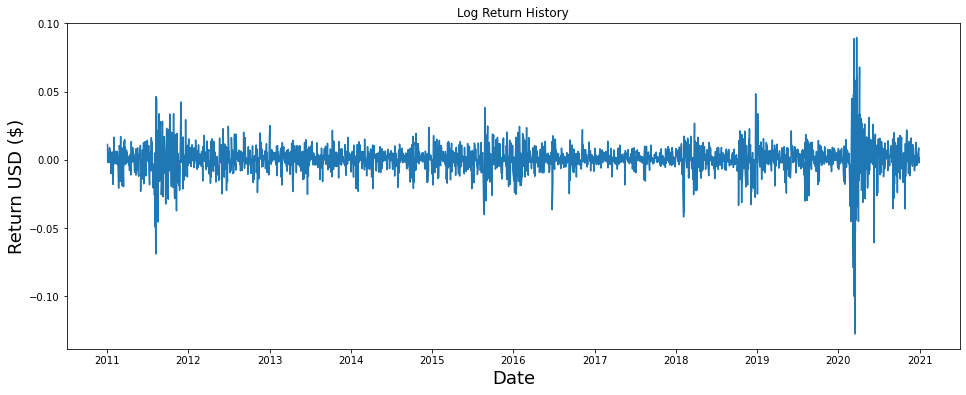

In [65]:
plt.figure(figsize=(16,6))
plt.title('Log Return History')
plt.plot(nifty_2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Return USD ($)', fontsize=18)
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
nifty_3 = scaler.fit_transform(np.array(nifty_2).reshape(-1, 1))

In [68]:
nifty_3

array([[0.63912033],
       [0.58130546],
       [0.61033249],
       ...,
       [0.627311  ],
       [0.57709106],
       [0.59351964]])

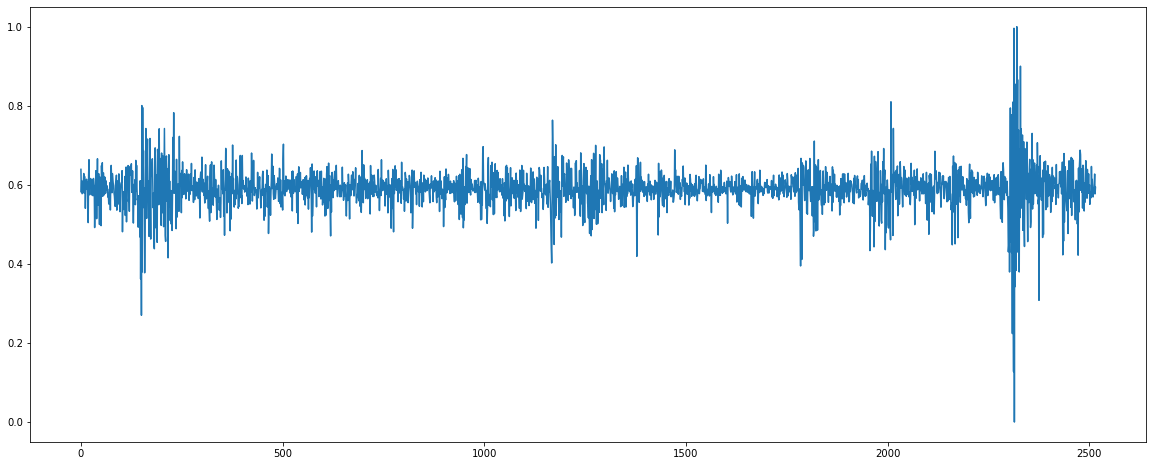

In [69]:
plt.figure(figsize = (20,8))
plt.plot(nifty_3)

In [71]:
train_size = int(len(nifty_3)*0.8)
test_size = len(nifty_3)-train_size
train_size,test_size

(2012, 504)

In [72]:
train_data,test_data = nifty_3[0:train_size],nifty_3[train_size:]

In [73]:
train_data.shape,test_data.shape

((2012, 1), (504, 1))

In [74]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y
                

In [75]:
x_train, y_train = creat_dataset(train_data,50)
x_test, y_test = creat_dataset(test_data,50)

In [76]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
x_train,x_test

(array([[0.63912033, 0.58130546, 0.61033249, ..., 0.61981501, 0.55943249,
         0.53552545],
        [0.58130546, 0.61033249, 0.57757257, ..., 0.55943249, 0.53552545,
         0.49676537],
        [0.61033249, 0.57757257, 0.57885505, ..., 0.53552545, 0.49676537,
         0.64858943],
        ...,
        [0.65225644, 0.56010065, 0.68520823, ..., 0.51420235, 0.49163211,
         0.46088033],
        [0.56010065, 0.68520823, 0.58618838, ..., 0.49163211, 0.46088033,
         0.81006293],
        [0.68520823, 0.58618838, 0.52065007, ..., 0.46088033, 0.81006293,
         0.62658181]]),
 array([[0.59318396, 0.4720071 , 0.74268423, ..., 0.6009198 , 0.61921678,
         0.58335541],
        [0.4720071 , 0.74268423, 0.61949482, ..., 0.61921678, 0.58335541,
         0.61023054],
        [0.74268423, 0.61949482, 0.63174598, ..., 0.58335541, 0.61023054,
         0.60437129],
        ...,
        [0.55677542, 0.58031621, 0.58797182, ..., 0.56934237, 0.57780249,
         0.59078141],
        [0.5

In [77]:
import seaborn as sns 
from sklearn.preprocessing import Normalizer
normalizedx_train = Normalizer().fit_transform(x_train)

normalizedx_train = pd.DataFrame(normalizedx_train)
normalizedx_train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.153124,0.139272,0.146227,0.138378,0.138685,0.139202,0.144819,0.150606,0.138833,0.148831,...,0.142500,0.159541,0.132557,0.131487,0.150513,0.139218,0.119719,0.148499,0.134032,0.128304
1,0.139923,0.146910,0.139025,0.139333,0.139853,0.145496,0.151310,0.139482,0.149527,0.142902,...,0.160286,0.133177,0.132101,0.151217,0.139869,0.120278,0.149193,0.134658,0.128904,0.119574
2,0.146559,0.138692,0.139000,0.139519,0.145149,0.150948,0.139149,0.149170,0.142560,0.129807,...,0.132858,0.131786,0.150855,0.139535,0.119991,0.148836,0.134336,0.128596,0.119288,0.155746
3,0.138708,0.139016,0.139534,0.145165,0.150965,0.139164,0.149186,0.142576,0.129822,0.139625,...,0.131801,0.150872,0.139551,0.120005,0.148853,0.134352,0.128610,0.119302,0.155763,0.145809
4,0.138631,0.139148,0.144763,0.150547,0.138779,0.148773,0.142181,0.129462,0.139238,0.143322,...,0.150454,0.139164,0.119672,0.148440,0.133979,0.128254,0.118971,0.155332,0.145405,0.157057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,0.106313,0.120560,0.159926,0.137331,0.168006,0.143727,0.127658,0.143605,0.139151,0.137777,...,0.117392,0.145998,0.143610,0.150110,0.143787,0.122271,0.120330,0.144110,0.126508,0.126077
1957,0.120366,0.159669,0.137110,0.167735,0.143496,0.127452,0.143373,0.138927,0.137555,0.108469,...,0.145763,0.143379,0.149868,0.143555,0.122074,0.120136,0.143878,0.126305,0.125874,0.120349
1958,0.159809,0.137230,0.167883,0.143622,0.127565,0.143500,0.139050,0.137676,0.108564,0.164711,...,0.143505,0.150000,0.143682,0.122182,0.120242,0.144004,0.126416,0.125985,0.120455,0.112920
1959,0.136290,0.166732,0.142638,0.126690,0.142516,0.138096,0.136732,0.107820,0.163581,0.123351,...,0.148972,0.142697,0.121344,0.119417,0.143017,0.125549,0.125121,0.119629,0.112146,0.197113


<AxesSubplot:>

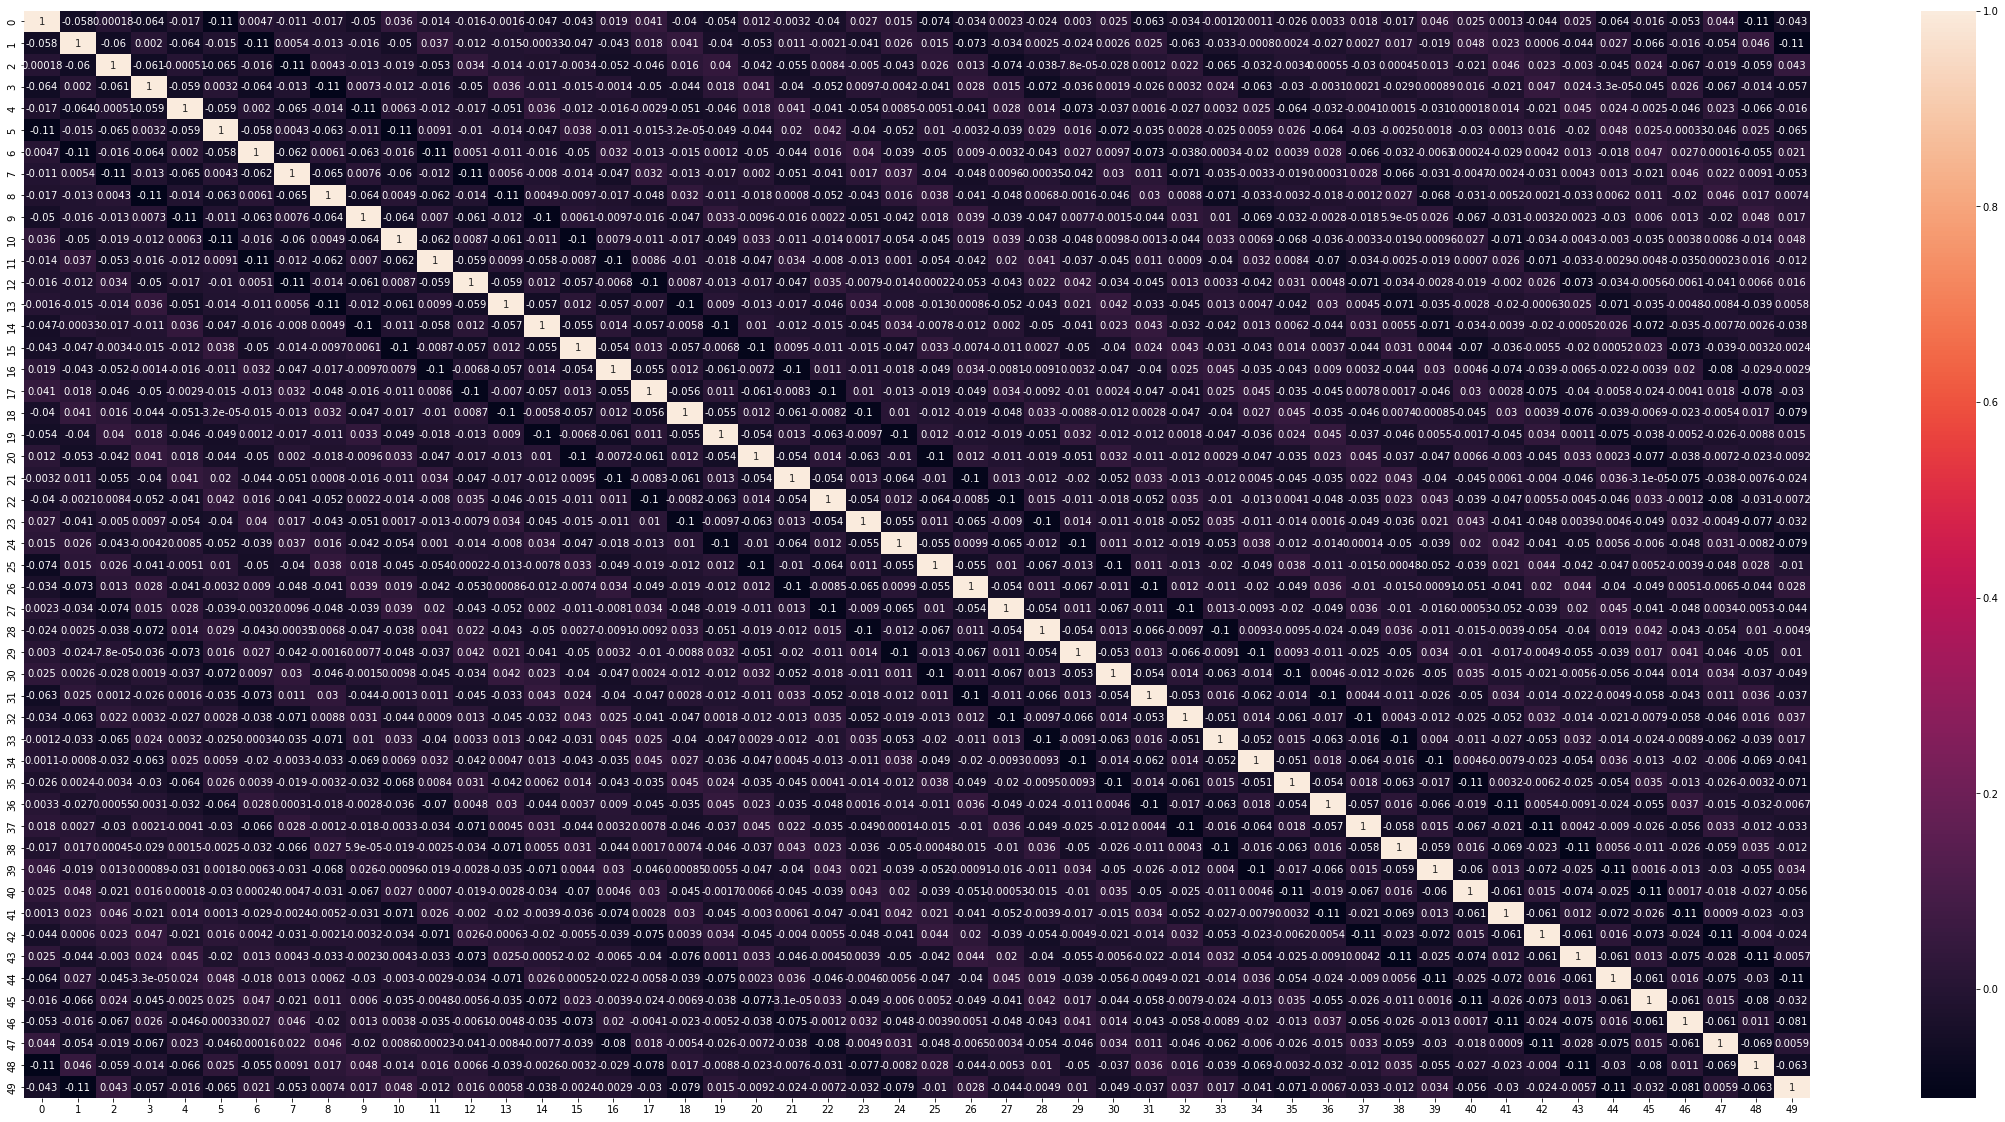

In [78]:
# plot correlation heatmap
plt.figure(figsize = (40,20))
sns.heatmap(normalizedx_train.corr(), annot = True)

In [79]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [80]:
x_train.shape, x_test.shape

((1961, 50, 1), (453, 50, 1))

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [84]:
model_1 = Sequential()
model_1.add(LSTM(50, return_sequences = True, input_shape = (50,1)))
model_1.add(LSTM(50, return_sequences= True))
model_1.add(LSTM(50))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error',optimizer='adam')

In [85]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [86]:
model_1.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 50, batch_size = 32, verbose = 1)

Epoch 1/50
62/62 [==============================] - 30s 175ms/step - loss: 0.0250 - val_loss: 0.0063
Epoch 2/50
62/62 [==============================] - 6s 97ms/step - loss: 0.0019 - val_loss: 0.0064
Epoch 3/50
62/62 [==============================] - 7s 109ms/step - loss: 0.0019 - val_loss: 0.0062
Epoch 4/50
62/62 [==============================] - 7s 110ms/step - loss: 0.0019 - val_loss: 0.0062
Epoch 5/50
62/62 [==============================] - 7s 108ms/step - loss: 0.0019 - val_loss: 0.0062
Epoch 6/50
62/62 [==============================] - 7s 111ms/step - loss: 0.0019 - val_loss: 0.0065
Epoch 7/50
62/62 [==============================] - 7s 111ms/step - loss: 0.0019 - val_loss: 0.0062
Epoch 8/50
62/62 [==============================] - 7s 109ms/step - loss: 0.0019 - val_loss: 0.0062
Epoch 9/50
62/62 [==============================] - 7s 115ms/step - loss: 0.0019 - val_loss: 0.0066
Epoch 10/50
62/62 [==============================] - 7s 113ms/step - loss: 0.0020 - val_loss: 0.0063

In [87]:
train_pred = model_1.predict(x_train)
test_pred = model_1.predict(x_test)
train_pred, test_pred

15/15 [==============================] - 1s 36ms/step


(array([[0.5791974 ],
        [0.5789539 ],
        [0.57867247],
        ...,
        [0.57618994],
        [0.57567465],
        [0.5754665 ]], dtype=float32),
 array([[0.58002216],
        [0.5800759 ],
        [0.5801651 ],
        [0.5802713 ],
        [0.58036226],
        [0.58044994],
        [0.5805011 ],
        [0.5804633 ],
        [0.58039   ],
        [0.5803101 ],
        [0.58022565],
        [0.58016986],
        [0.58018154],
        [0.58025694],
        [0.580359  ],
        [0.5804696 ],
        [0.58058566],
        [0.58070177],
        [0.5807844 ],
        [0.58082277],
        [0.58083427],
        [0.5808389 ],
        [0.58084667],
        [0.58084524],
        [0.58082366],
        [0.5807816 ],
        [0.5807305 ],
        [0.5806979 ],
        [0.5806893 ],
        [0.5806788 ],
        [0.5806699 ],
        [0.58067137],
        [0.58067584],
        [0.58065516],
        [0.5805874 ],
        [0.5805126 ],
        [0.5804518 ],
        [0.5803402 ],
  

In [88]:
train_pred.shape

(1961, 1)

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [90]:
y_train.shape, train_pred.shape

((1961,), (1961, 1))

In [91]:
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.04


In [92]:
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = test_pred))
print("RMSE: {:.2f}".format(rmse))

RMSE: 0.08


In [93]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
train_pred, test_pred

(array([[-0.00177208],
        [-0.001825  ],
        [-0.00188617],
        ...,
        [-0.00242571],
        [-0.0025377 ],
        [-0.00258294]], dtype=float32),
 array([[-0.00159283],
        [-0.00158115],
        [-0.00156177],
        [-0.00153868],
        [-0.00151892],
        [-0.00149986],
        [-0.00148875],
        [-0.00149696],
        [-0.00151289],
        [-0.00153025],
        [-0.00154861],
        [-0.00156073],
        [-0.00155819],
        [-0.00154181],
        [-0.00151963],
        [-0.00149559],
        [-0.00147036],
        [-0.00144513],
        [-0.00142717],
        [-0.00141883],
        [-0.00141633],
        [-0.00141532],
        [-0.00141364],
        [-0.00141395],
        [-0.00141864],
        [-0.00142778],
        [-0.00143888],
        [-0.00144597],
        [-0.00144784],
        [-0.00145012],
        [-0.00145206],
        [-0.00145174],
        [-0.00145076],
        [-0.00145526],
        [-0.00146999],
        [-0.00148625],
    

In [94]:
import math
from sklearn.metrics import mean_squared_error

In [95]:
math.sqrt(mean_squared_error(y_train, train_pred))

0.5920503987747734

In [96]:
math.sqrt(mean_squared_error(y_test, test_pred))

0.5970064413784255

In [99]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back = 50
trainPredictPlot = numpy.empty_like(nifty_3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

In [100]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(nifty_3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(nifty_3)-1, :] = test_pred

In [101]:
testPredictPlot

array([[        nan],
       [        nan],
       [        nan],
       ...,
       [-0.00151022],
       [-0.00151941],
       [        nan]])

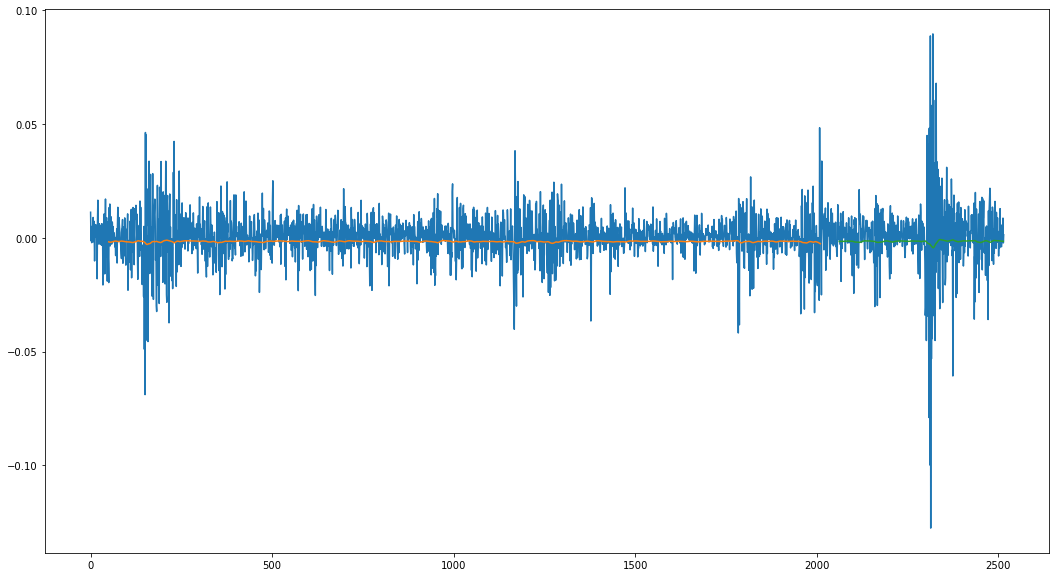

In [104]:
# plot baseline and predictions
plt.figure(figsize = (18,10))
plt.plot(scaler.inverse_transform(nifty_3))
plt.plot((trainPredictPlot))
plt.plot((testPredictPlot))
plt.show()

In [105]:
len(train_data),len(test_data)

(2012, 504)

In [108]:
x_input = test_data[454:].reshape(1,-1)
x_input.shape

(1, 50)

In [109]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [111]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<1):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


[0.58036315]
51


In [112]:
scaler.inverse_transform(lst_output)

array([[-0.00151872]])

In [114]:
day_new=np.arange(1,51)
day_pred=np.arange(51,52)

In [115]:
import matplotlib.pyplot as plt

In [117]:
len(nifty_3)

2516

In [118]:
plt.figure(figsize = (20,10))
plt.plot(day_new,scaler.inverse_transform(nifty_2[2466:]))
plt.scatter(day_pred,scaler.inverse_transform(lst_output), c = "r")

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.0047162  -0.00219811  0.00520535  0.00343984 -0.01876447 -0.00303021
 -0.03592554  0.01187652 -0.01220371  0.01224295  0.01764274  0.02180753
  0.01927327 -0.00028776  0.01163197 -0.00140078  0.00762273 -0.01002865
  0.01351855  0.01158073 -0.00480344 -0.01163121  0.00393868 -0.00681574
  0.00562011  0.01603246 -0.00158567  0.00239411 -0.00460614  0.01120814
  0.00178956 -0.00062435  0.00879746 -0.00193751  0.00278327 -0.00798096
 -0.00128593 -0.0012658  -0.00436879  0.01283848  0.00177123  0.00574114
 -0.0035173  -0.00391393 -0.00207524  0.00074553  0.00353035  0.00868471
 -0.00222986  0.00134065].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Figure size 1440x720 with 0 Axes>

In [150]:
scaler.inverse_transform(nifty_2)

array([[14.22998047],
       [-1.67004395],
       [ 6.36010742],
       ...,
       [32.30004883],
       [-8.32006836],
       [ 5.        ]])

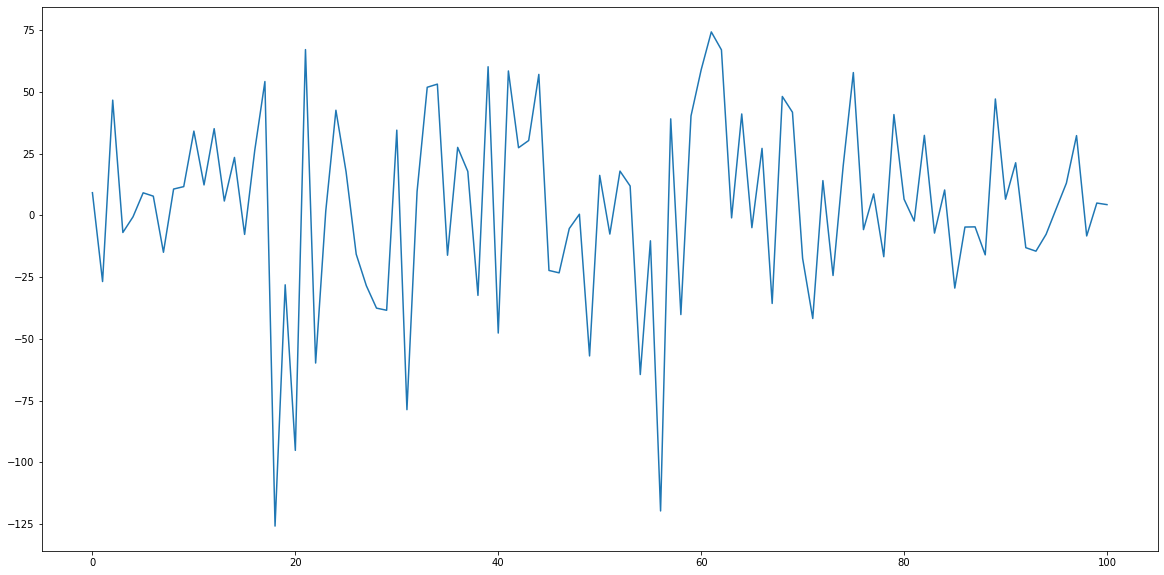

In [151]:
plt.figure(figsize = (20,10))
nifty_3 = nifty_2.tolist()
nifty_3.extend((lst_output))
nifty_3 = scaler.inverse_transform(nifty_3)
plt.plot((nifty_3[2416:]))

In [152]:
check_nifty = yf.download('^GSPC',start="2020-12-10", end="2021-01-05",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [153]:
check_nifty["Close"].tail(10)

Date
2020-12-18 00:00:00-05:00    3709.409912
2020-12-21 00:00:00-05:00    3694.919922
2020-12-22 00:00:00-05:00    3687.260010
2020-12-23 00:00:00-05:00    3690.010010
2020-12-24 00:00:00-05:00    3703.060059
2020-12-28 00:00:00-05:00    3735.360107
2020-12-29 00:00:00-05:00    3727.040039
2020-12-30 00:00:00-05:00    3732.040039
2020-12-31 00:00:00-05:00    3756.070068
2021-01-04 00:00:00-05:00    3700.649902
Name: Close, dtype: float64

In [154]:
check_nifty.to_csv("^GSPC_check.csv")

In [155]:
check_nifty = pd.read_csv("^GSPC_check.csv")

In [156]:
check_nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16 non-null     object 
 1   Open       16 non-null     float64
 2   High       16 non-null     float64
 3   Low        16 non-null     float64
 4   Close      16 non-null     float64
 5   Adj Close  16 non-null     float64
 6   Volume     16 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.0+ KB


In [157]:
check_nifty["Date"] = pd.to_datetime(check_nifty["Date"])

In [158]:
check_nifty = check_nifty.set_index("Date")

In [159]:
check_nifty["Return"] = check_nifty["Close"] - check_nifty["Close"].shift(1)

In [160]:
check_nifty_1 = check_nifty["Return"].dropna()
check_nifty_1,nifty_1[1824:]

(Date
 2020-12-11 00:00:00-05:00    -4.640137
 2020-12-14 00:00:00-05:00   -15.969971
 2020-12-15 00:00:00-05:00    47.130127
 2020-12-16 00:00:00-05:00     6.549805
 2020-12-17 00:00:00-05:00    21.310059
 2020-12-18 00:00:00-05:00   -13.070068
 2020-12-21 00:00:00-05:00   -14.489990
 2020-12-22 00:00:00-05:00    -7.659912
 2020-12-23 00:00:00-05:00     2.750000
 2020-12-24 00:00:00-05:00    13.050049
 2020-12-28 00:00:00-05:00    32.300049
 2020-12-29 00:00:00-05:00    -8.320068
 2020-12-30 00:00:00-05:00     5.000000
 2020-12-31 00:00:00-05:00    24.030029
 2021-01-04 00:00:00-05:00   -55.420166
 Name: Return, dtype: float64,
 Date
 2018-04-04 00:00:00-04:00    30.239990
 2018-04-05 00:00:00-04:00    18.150146
 2018-04-06 00:00:00-04:00   -58.370117
 2018-04-09 00:00:00-04:00     8.689941
 2018-04-10 00:00:00-04:00    43.710205
                                ...    
 2020-12-23 00:00:00-05:00     2.750000
 2020-12-24 00:00:00-05:00    13.050049
 2020-12-28 00:00:00-05:00    32.3000

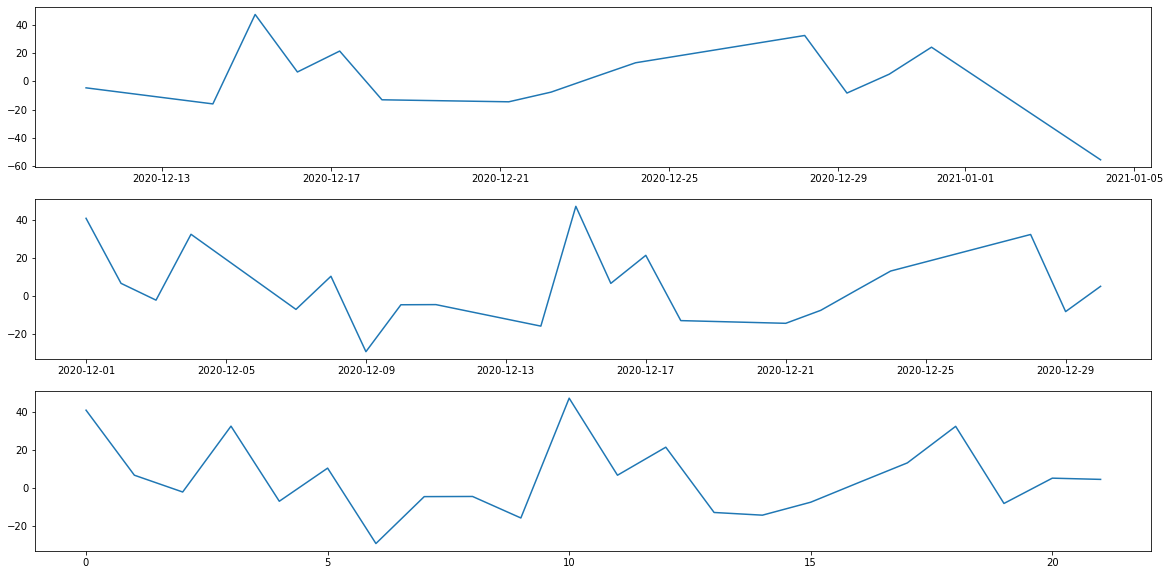

In [166]:
plt.figure(figsize = (20,10))
plt.subplot(3,1,1)
plt.plot(check_nifty_1);
plt.subplot(3,1,2)
plt.plot(nifty_1[2495:])
plt.subplot(3,1,3)
plt.plot((nifty_3[2495:]))

# Prediction for next 10 days

In [788]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output_10=[]
n_steps=30
i=0
while(i<10):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_10.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_10.extend(yhat.tolist())
        i=i+1
    

print(lst_output_10)

0 day input [0.88514288 0.89350981 0.8909603  0.85777334 0.8500241  0.8572118
 0.87947134 0.87822455 0.8938803  0.91280417 0.91320843 0.91177102
 0.89514946 0.91852068 0.90870493 0.89337491 0.85731292 0.85192214
 0.86046872 0.8709695  0.89591303 0.89820415 0.89233058 0.90379717
 0.90844675 0.90304457 0.89428456 0.88007762 0.84580541 0.81800568]
0 day output [[0.79073215]]
1 day input [0.89350981 0.8909603  0.85777334 0.8500241  0.8572118  0.87947134
 0.87822455 0.8938803  0.91280417 0.91320843 0.91177102 0.89514946
 0.91852068 0.90870493 0.89337491 0.85731292 0.85192214 0.86046872
 0.8709695  0.89591303 0.89820415 0.89233058 0.90379717 0.90844675
 0.90304457 0.89428456 0.88007762 0.84580541 0.81800568 0.79073215]
1 day output [[0.7684315]]
2 day input [0.8909603  0.85777334 0.8500241  0.8572118  0.87947134 0.87822455
 0.8938803  0.91280417 0.91320843 0.91177102 0.89514946 0.91852068
 0.90870493 0.89337491 0.85731292 0.85192214 0.86046872 0.8709695
 0.89591303 0.89820415 0.89233058 0.90

In [178]:
day_new_10=np.arange(1,31)
day_pred_10=np.arange(31,41)

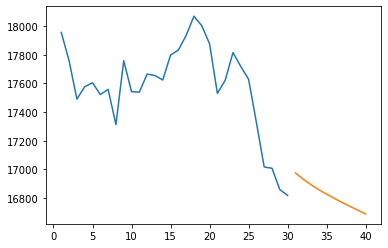

In [179]:
plt.plot(day_new_10,scaler.inverse_transform(nifty_2[955:]))
plt.plot(day_pred_10,scaler.inverse_transform(lst_output_10))

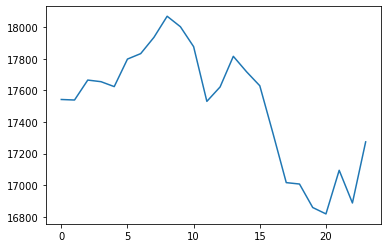

In [180]:
plt.plot(check_nifty_1)

# German Market

In [181]:
sdax = yf.download('^SDAXI',start="2018-10-01", end="2022-09-30",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [182]:
sdax = sdax.reset_index()["Close"]

In [183]:
sdax

0       11959.400391
1       11904.490234
2       11801.990234
3       11575.839844
4       11310.219727
            ...     
1008    10507.959961
1009    10507.910156
1010    10523.219727
1011    10531.519531
1012    10261.400391
Name: Close, Length: 1013, dtype: float64

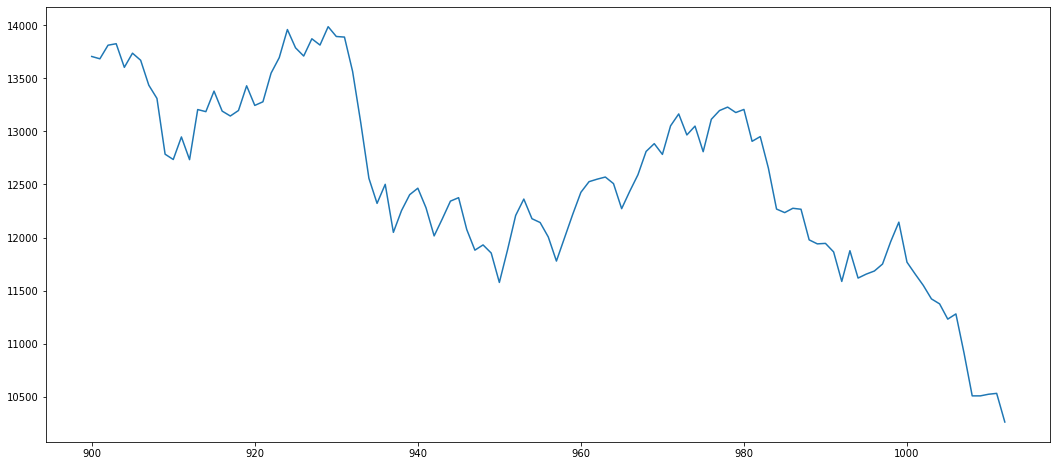

In [184]:
plt.figure(figsize = (18, 8))
plt.plot(sdax[900:])

In [187]:
sdax_1 = scaler.fit_transform(np.array(sdax).reshape(-1,1))

In [188]:
sdax_1

array([[0.42089638],
       [0.41506516],
       [0.40418009],
       ...,
       [0.26838006],
       [0.26926147],
       [0.24057595]])

In [190]:
train_len = int(len(sdax_1)*0.8)
test_len = 1- train_len
train_data, test_data = sdax_1[:train_len], sdax_1[train_len:]
train_data.shape, test_data.shape

((810, 1), (203, 1))

In [193]:
def creat_dataset(data, time_stamp):
    data_x, data_y = [], []
    for i in range(len(data)-time_stamp-1):
        a = data[i: i + time_stamp, 0]
        data_x.append(a)
        b = data[i+time_stamp,0]
        data_y.append(b)
    return data_x, data_y

In [191]:
x_train_1, y_train_1 = creat_dataset(train_data,30)

In [192]:
x_test_1, y_test_1 = creat_dataset(test_data,30)

In [197]:
x_train_1, y_train_1, x_test_1, y_test_1

([array([0.42089638, 0.41506516, 0.40418009, 0.38016387, 0.35195614,
         0.34726869, 0.30650123, 0.29667916, 0.30722542, 0.30132844,
         0.33476839, 0.33960777, 0.33952491, 0.31838552, 0.31428744,
         0.27794619, 0.26708238, 0.28105034, 0.27039892, 0.29217217,
         0.29520093, 0.3224698 , 0.33664269, 0.35313383, 0.33528236,
         0.33488517, 0.34467965, 0.33527065, 0.32974535, 0.29879354]),
  array([0.41506516, 0.40418009, 0.38016387, 0.35195614, 0.34726869,
         0.30650123, 0.29667916, 0.30722542, 0.30132844, 0.33476839,
         0.33960777, 0.33952491, 0.31838552, 0.31428744, 0.27794619,
         0.26708238, 0.28105034, 0.27039892, 0.29217217, 0.29520093,
         0.3224698 , 0.33664269, 0.35313383, 0.33528236, 0.33488517,
         0.34467965, 0.33527065, 0.32974535, 0.29879354, 0.30667007]),
  array([0.40418009, 0.38016387, 0.35195614, 0.34726869, 0.30650123,
         0.29667916, 0.30722542, 0.30132844, 0.33476839, 0.33960777,
         0.33952491, 0.3183855

In [198]:
x_train_1, y_train_1 = np.asarray(x_train_1), np.asarray(y_train_1)
x_test_1, y_test_1 = np.asarray(x_test_1), np.asarray(y_test_1)
x_train_1, x_test_1

(array([[0.42089638, 0.41506516, 0.40418009, ..., 0.33527065, 0.32974535,
         0.29879354],
        [0.41506516, 0.40418009, 0.38016387, ..., 0.32974535, 0.29879354,
         0.30667007],
        [0.40418009, 0.38016387, 0.35195614, ..., 0.29879354, 0.30667007,
         0.29309827],
        ...,
        [0.97388953, 0.95984638, 0.97880959, ..., 0.86203789, 0.92162752,
         0.91095049],
        [0.95984638, 0.97880959, 0.97650211, ..., 0.92162752, 0.91095049,
         0.90596779],
        [0.97880959, 0.97650211, 0.98211348, ..., 0.91095049, 0.90596779,
         0.8858076 ]]),
 array([[0.84777261, 0.85186   , 0.85113468, ..., 0.69827436, 0.73738635,
         0.74497717],
        [0.85186   , 0.85113468, 0.82941453, ..., 0.73738635, 0.74497717,
         0.72102681],
        [0.85113468, 0.82941453, 0.84464294, ..., 0.74497717, 0.72102681,
         0.75562858],
        ...,
        [0.55031823, 0.55342125, 0.5215285 , ..., 0.34876923, 0.30949909,
         0.26675954],
        [0.5

In [199]:
x_train_1.shape, x_test_1.shape

((779, 30), (172, 30))

In [203]:
x_train_1 = x_train_1.reshape(x_train_1.shape[0],x_train_1.shape[1],1)
x_test_1 = x_test_1.reshape(x_test_1.shape[0],x_test_1.shape[1],1)
x_train_1.shape, x_test_1.shape

((779, 30, 1), (172, 30, 1))

In [204]:
model_1.fit(x_train_1, y_train_1, validation_data= (x_test_1, y_test_1), epochs= 50, batch_size = 64, verbose = 1)

Epoch 1/50
13/13 [==============================] - 1s 48ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 2/50
13/13 [==============================] - 1s 54ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 3/50
13/13 [==============================] - 1s 72ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 4/50
13/13 [==============================] - 1s 56ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 5/50
13/13 [==============================] - 1s 62ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 6/50
13/13 [==============================] - 1s 67ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 7/50
13/13 [==============================] - 1s 69ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 8/50
13/13 [==============================] - 1s 65ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 9/50
13/13 [==============================] - 1s 62ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 10/50
13/13 [==============================] - 1s 72ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 11/

In [213]:
x_test_1.shape

(172, 30, 1)

In [214]:
x_input_sdax = x_test_1[142:,0].reshape(1,-1)
x_input_sdax.shape

(1, 30)

In [215]:
temp_input_sdax = list(x_input_sdax)

In [226]:
# demonstrate prediction for next 2 days
from numpy import array

lst_output_sdax=[]
n_steps=30
i=0
while(i<2):
    
    if(len(temp_input_sdax)>30):
        #print(temp_input)
        x_input_sdax=np.array(temp_input_sdax[1:])
        print("{} day input {}".format(i,x_input_sdax))
        x_input_sdax=x_input_sdax.reshape(1,-1)
        x_input_sdax = x_input_sdax.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model_1.predict(x_input_sdax, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_sdax.extend(yhat[0].tolist())
        temp_input_sdax=temp_input_sdax[1:]
        #print(temp_input)
        lst_output_sdax.extend(yhat.tolist())
        i=i+1
    else:
        x_input_sdax = x_input_sdax.reshape((1, n_steps,1))
        yhat = model_1.predict(x_input_sdax, verbose=0)
        print(yhat[0])
        temp_input_sdax.extend(yhat[0].tolist())
        print(len(temp_input_sdax))
        lst_output_sdax.extend(yhat.tolist())
        i=i+1
    

print(lst_output_sdax)

[0.55045635]
7
[0.55045635]
8
[[0.5504563450813293], [0.5504563450813293]]


In [227]:
day_new_sdax = np.arange(1,31)
day_pred_sdax = np.arange(31,33)

In [228]:
len(sdax_1)

1013

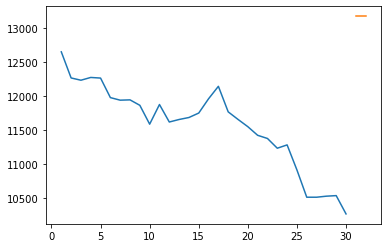

In [229]:
plt.plot(day_new_sdax,scaler.inverse_transform(sdax_1[983:]))
plt.plot(day_pred_sdax,scaler.inverse_transform(lst_output_sdax))

In [223]:
sdax_check = yf.download('^SDAXI',start="2022-09-01", end="2022-10-07",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [224]:
sdax_check = sdax_check.reset_index()["Close"]

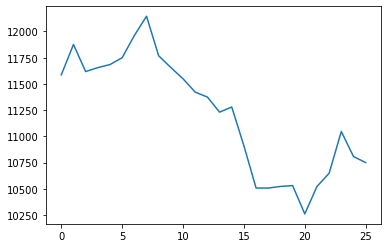

In [225]:
plt.plot(sdax_check)

In [234]:
x_train_1.shape

(779, 30, 1)

In [236]:
x_train_check = x_train_1.reshape(x_train_1.shape[0],x_train_1.shape[1])
x_train_check.shape

(779, 30)

In [237]:
normalizedx_train_sdax = Normalizer().fit_transform(x_train_check)

normalizedx_train_sdax = pd.DataFrame(normalizedx_train_sdax)
normalizedx_train_sdax

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.232374,0.229155,0.223145,0.209886,0.194313,0.191725,0.169217,0.163795,0.169617,0.166361,...,0.162978,0.178033,0.185858,0.194963,0.185107,0.184888,0.190295,0.185101,0.182050,0.164962
1,0.232114,0.226026,0.212596,0.196822,0.194200,0.171402,0.165909,0.171807,0.168509,0.187210,...,0.180332,0.188258,0.197480,0.187497,0.187275,0.192752,0.187491,0.184401,0.167092,0.171497
2,0.229142,0.215527,0.199535,0.196877,0.173765,0.168197,0.174176,0.170832,0.189791,0.192534,...,0.190853,0.200203,0.190082,0.189857,0.195410,0.190075,0.186943,0.169395,0.173861,0.166167
3,0.218548,0.202332,0.199638,0.176201,0.170555,0.176618,0.173228,0.192451,0.195233,0.195186,...,0.203009,0.192747,0.192519,0.198149,0.192740,0.189564,0.171770,0.176298,0.168496,0.160475
4,0.204712,0.201986,0.178274,0.172561,0.178695,0.175265,0.194715,0.197530,0.197482,0.185186,...,0.195014,0.194783,0.200480,0.195007,0.191794,0.173791,0.178372,0.170478,0.162363,0.158836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,0.184947,0.184210,0.187177,0.184478,0.188122,0.187679,0.188757,0.192094,0.189684,0.192195,...,0.176463,0.174892,0.178716,0.169644,0.171291,0.168015,0.174721,0.168071,0.164481,0.165679
775,0.184471,0.187442,0.184739,0.188389,0.187945,0.189025,0.192366,0.189953,0.192468,0.191189,...,0.175140,0.178969,0.169885,0.171534,0.168253,0.174968,0.168310,0.164714,0.165914,0.177383
776,0.187751,0.185044,0.188700,0.188255,0.189337,0.192683,0.190266,0.192785,0.191505,0.190281,...,0.179264,0.170165,0.171817,0.168531,0.175257,0.168587,0.164986,0.166188,0.177676,0.175618
777,0.185485,0.189149,0.188703,0.189788,0.193142,0.190719,0.193244,0.191961,0.190734,0.189590,...,0.170570,0.172226,0.168932,0.175674,0.168989,0.165378,0.166584,0.178099,0.176036,0.175073


<AxesSubplot:>

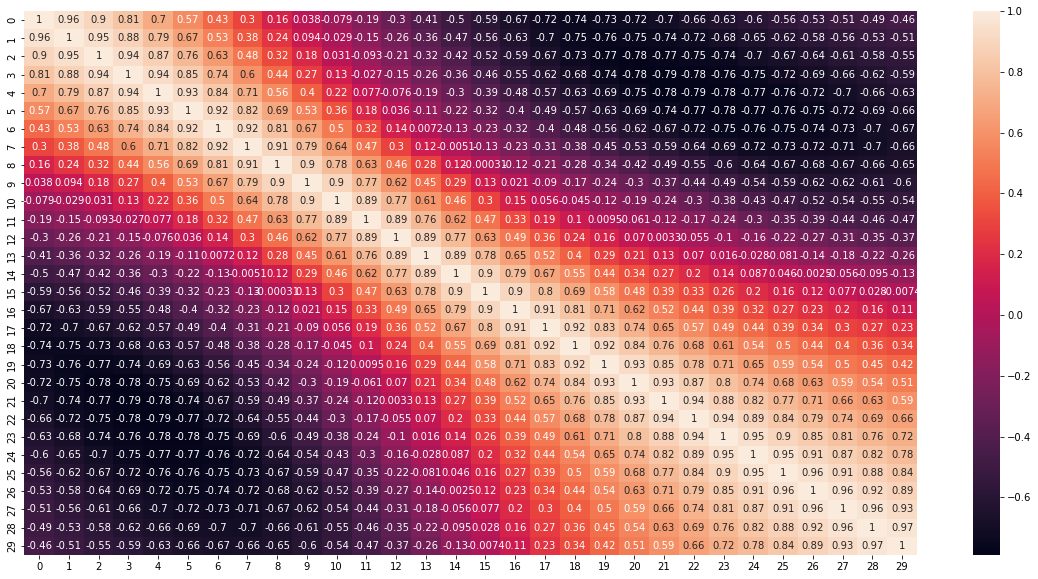

In [238]:
plt.figure(figsize = (20,10))
sns.heatmap(normalizedx_train_sdax.corr(), annot = True)

In [3]:
sp500 = yf.download('^NSEI',start="2018-10-01", end="2022-09-30",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01 00:00:00-04:00,2926.290039,2937.060059,2917.909912,2924.590088,2924.590088,3375890000
2018-10-02 00:00:00-04:00,2923.800049,2931.419922,2919.370117,2923.429932,2923.429932,3432620000
2018-10-03 00:00:00-04:00,2931.689941,2939.860107,2921.360107,2925.510010,2925.510010,3625510000
2018-10-04 00:00:00-04:00,2919.350098,2919.780029,2883.919922,2901.610107,2901.610107,3510370000
2018-10-05 00:00:00-04:00,2902.540039,2909.639893,2869.290039,2885.570068,2885.570068,3340820000


In [5]:
# Clean the data and convert to daily returns
sp500["returns"] = np.log(sp500["Close"]/sp500["Close"].shift(1))
sp500 = sp500.dropna()

C:\Users\agarw\AppData\Local\Temp\ipykernel_41452\827370201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500["ma"] = sp500["Close"].rolling(window=window_size).mean()


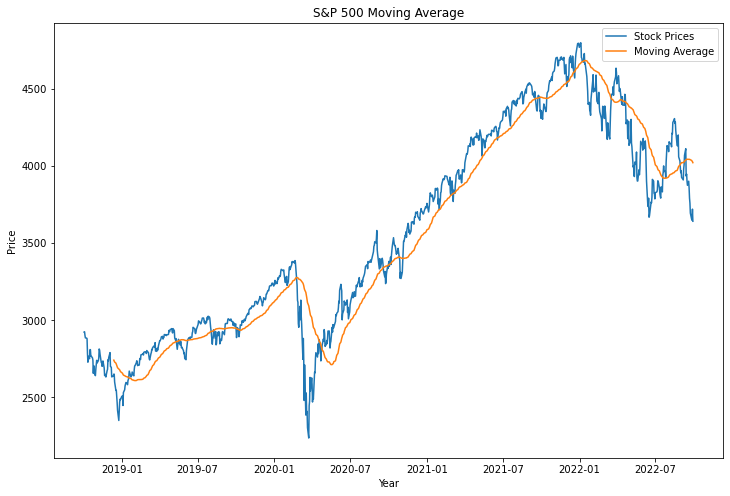

In [6]:
# Calculate the moving average of the stock prices
window_size = 50
sp500["ma"] = sp500["Close"].rolling(window=window_size).mean()

# Plot the moving average and the stock prices
plt.figure(figsize=(12, 8))
plt.plot(sp500["Close"], label="Stock Prices")
plt.plot(sp500["ma"], label="Moving Average")
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("S&P 500 Moving Average")
plt.legend()
plt.show()

C:\Users\agarw\AppData\Local\Temp\ipykernel_41452\3961490358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500["EWMA"] = sp500["Close"].ewm(span=30, adjust=False).mean()


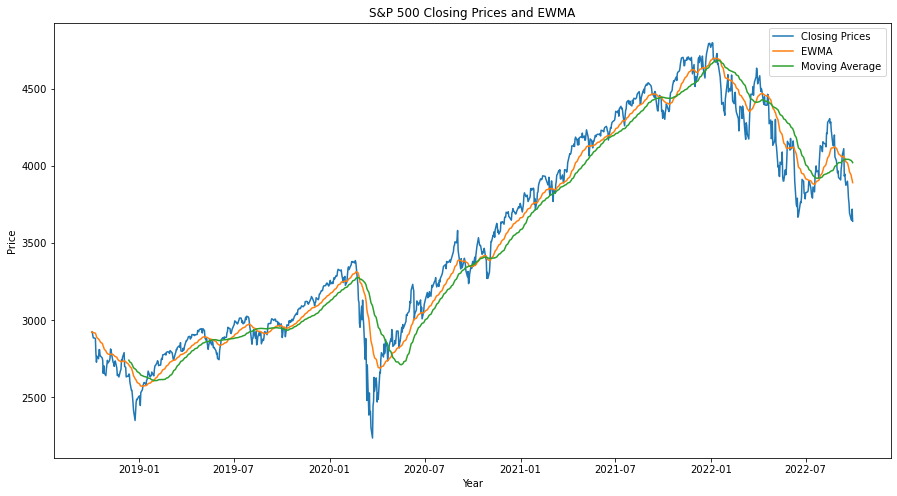

In [7]:
# Calculate EWMA
sp500["EWMA"] = sp500["Close"].ewm(span=30, adjust=False).mean()

# Plot the original closing prices and the EWMA
plt.figure(figsize=(15, 8))
plt.plot(sp500["Close"], label="Closing Prices")
plt.plot(sp500["EWMA"], label="EWMA")
plt.plot(sp500["ma"], label="Moving Average")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("S&P 500 Closing Prices and EWMA")
plt.show()

In [8]:
result = adfuller(sp500["Close"])
print("Augmented Dickey-Fuller Test Results")
print("Test Statistic: {:.3f}".format(result[0]))
print("p-value: {:.3f}".format(result[1]))
print("Critical Values:")
for key, value in result[4].items():
    print("\t{}: {:.3f}".format(key, value))
    
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

Augmented Dickey-Fuller Test Results
Test Statistic: -1.364
p-value: 0.599
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
The time series is not stationary.


# Deep Learning

In [9]:
df = sp500.reset_index()["Close"]
df

0       2923.429932
1       2925.510010
2       2901.610107
3       2885.570068
4       2884.429932
           ...     
1001    3693.229980
1002    3655.040039
1003    3647.290039
1004    3719.040039
1005    3640.469971
Name: Close, Length: 1006, dtype: float64

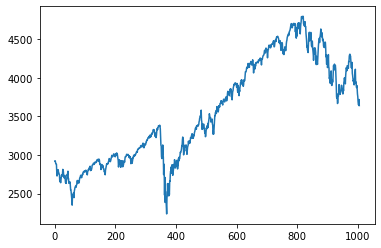

In [10]:
plt.plot(df)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
train_size = int(len(df)*0.65)
test_size = len(df) - train_size
train_data,test_data=df[0:train_size,:],df[train_size:len(df),:1]

In [13]:
train_size,test_size

(653, 353)

In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(252, 100)
(252,)


(None, None)

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 6s 222ms/step - loss: 0.0634 - val_loss: 0.0134
Epoch 2/100
9/9 [==============================] - 1s 108ms/step - loss: 0.0126 - val_loss: 0.0748
Epoch 3/100
9/9 [==============================] - 1s 107ms/step - loss: 0.0081 - val_loss: 0.0069
Epoch 4/100
9/9 [==============================] - 1s 105ms/step - loss: 0.0050 - val_loss: 0.0255
Epoch 5/100
9/9 [==============================] - 1s 105ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 6/100
9/9 [==============================] - 1s 106ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 7/100
9/9 [==============================] - 1s 105ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 8/100
9/9 [==============================] - 1s 103ms/step - loss: 0.0022 - val_loss: 0.0064
Epoch 9/100
9/9 [==============================] - 1s 103ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 10/100
9/9 [==============================] - 1s 102ms/step - loss: 0.0021 - val_loss: 0.0067
Epoch 11/

Epoch 82/100
9/9 [==============================] - 1s 110ms/step - loss: 6.7135e-04 - val_loss: 0.0018
Epoch 83/100
9/9 [==============================] - 1s 111ms/step - loss: 7.1318e-04 - val_loss: 0.0025
Epoch 84/100
9/9 [==============================] - 1s 112ms/step - loss: 7.3925e-04 - val_loss: 0.0035
Epoch 85/100
9/9 [==============================] - 1s 112ms/step - loss: 7.3914e-04 - val_loss: 0.0017
Epoch 86/100
9/9 [==============================] - 1s 118ms/step - loss: 7.2205e-04 - val_loss: 0.0044
Epoch 87/100
9/9 [==============================] - 1s 112ms/step - loss: 6.9588e-04 - val_loss: 0.0022
Epoch 88/100
9/9 [==============================] - 1s 110ms/step - loss: 6.1414e-04 - val_loss: 0.0016
Epoch 89/100
9/9 [==============================] - 1s 110ms/step - loss: 6.6604e-04 - val_loss: 0.0029
Epoch 90/100
9/9 [==============================] - 1s 109ms/step - loss: 5.9888e-04 - val_loss: 0.0022
Epoch 91/100
9/9 [==============================] - 1s 117ms/ste

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 17ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3261.9553603365844

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4400.235489759862

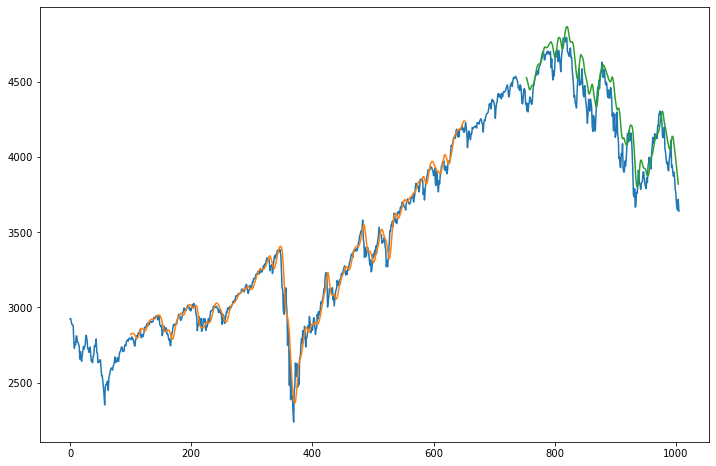

In [27]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(12, 8))
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

353

In [29]:
x_input=test_data[253:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6039316]
101
1 day input [0.68915192 0.66341297 0.66142018 0.69807667 0.69187155 0.72346007
 0.6589193  0.64997501 0.65019776 0.67848434 0.66587473 0.68043029
 0.71134281 0.75057449 0.74037961 0.72829755 0.75783453 0.73115398
 0.73619084 0.75152791 0.73397912 0.69570486 0.65000238 0.59090869
 0.58537957 0.60667953 0.55853094 0.56168434 0.59683257 0.59491782
 0.60892245 0.65425373 0.64970932 0.61901173 0.61794889 0.60487812
 0.62048878 0.62285668 0.62820616 0.65069011 0.64942398 0.63185965
 0.61793716 0.61128653 0.60683188 0.63527091 0.62264575 0.66400301
 0.67307237 0.6883313  0.67374837 0.67578427 0.65789167 0.69796734
 0.71704384 0.73965286 0.73509662 0.72437438 0.74937476 0.74811263
 0.74547505 0.74347053 0.73659724 0.77089366 0.76973304 0.79821108
 0.80485007 0.80799956 0.79582363 0.79961402 0.7780209  0.74266174
 0.73904327 0.74374795 0.76654844 0.71127241 0.70070261 0.68333356
 0.67115772 0.67578818 0.65914597 0.65286654 0.6808758  0.69115644
 0.71506279 0.73188474 0.66243999 

8 day output [[0.69385636]]
9 day input [0.65019776 0.67848434 0.66587473 0.68043029 0.71134281 0.75057449
 0.74037961 0.72829755 0.75783453 0.73115398 0.73619084 0.75152791
 0.73397912 0.69570486 0.65000238 0.59090869 0.58537957 0.60667953
 0.55853094 0.56168434 0.59683257 0.59491782 0.60892245 0.65425373
 0.64970932 0.61901173 0.61794889 0.60487812 0.62048878 0.62285668
 0.62820616 0.65069011 0.64942398 0.63185965 0.61793716 0.61128653
 0.60683188 0.63527091 0.62264575 0.66400301 0.67307237 0.6883313
 0.67374837 0.67578427 0.65789167 0.69796734 0.71704384 0.73965286
 0.73509662 0.72437438 0.74937476 0.74811263 0.74547505 0.74347053
 0.73659724 0.77089366 0.76973304 0.79821108 0.80485007 0.80799956
 0.79582363 0.79961402 0.7780209  0.74266174 0.73904327 0.74374795
 0.76654844 0.71127241 0.70070261 0.68333356 0.67115772 0.67578818
 0.65914597 0.65286654 0.6808758  0.69115644 0.71506279 0.73188474
 0.66243999 0.66764485 0.65019385 0.63924494 0.64962327 0.63244578
 0.60665606 0.59417543 

 0.69217795 0.69076461 0.69017881 0.69071406]
17 day output [[0.6925312]]
18 day input [0.73115398 0.73619084 0.75152791 0.73397912 0.69570486 0.65000238
 0.59090869 0.58537957 0.60667953 0.55853094 0.56168434 0.59683257
 0.59491782 0.60892245 0.65425373 0.64970932 0.61901173 0.61794889
 0.60487812 0.62048878 0.62285668 0.62820616 0.65069011 0.64942398
 0.63185965 0.61793716 0.61128653 0.60683188 0.63527091 0.62264575
 0.66400301 0.67307237 0.6883313  0.67374837 0.67578427 0.65789167
 0.69796734 0.71704384 0.73965286 0.73509662 0.72437438 0.74937476
 0.74811263 0.74547505 0.74347053 0.73659724 0.77089366 0.76973304
 0.79821108 0.80485007 0.80799956 0.79582363 0.79961402 0.7780209
 0.74266174 0.73904327 0.74374795 0.76654844 0.71127241 0.70070261
 0.68333356 0.67115772 0.67578818 0.65914597 0.65286654 0.6808758
 0.69115644 0.71506279 0.73188474 0.66243999 0.66764485 0.65019385
 0.63924494 0.64962327 0.63244578 0.60665606 0.59417543 0.56887025
 0.55394741 0.55091907 0.57895561 0.54825411

26 day output [[0.74720603]]
27 day input [0.55853094 0.56168434 0.59683257 0.59491782 0.60892245 0.65425373
 0.64970932 0.61901173 0.61794889 0.60487812 0.62048878 0.62285668
 0.62820616 0.65069011 0.64942398 0.63185965 0.61793716 0.61128653
 0.60683188 0.63527091 0.62264575 0.66400301 0.67307237 0.6883313
 0.67374837 0.67578427 0.65789167 0.69796734 0.71704384 0.73965286
 0.73509662 0.72437438 0.74937476 0.74811263 0.74547505 0.74347053
 0.73659724 0.77089366 0.76973304 0.79821108 0.80485007 0.80799956
 0.79582363 0.79961402 0.7780209  0.74266174 0.73904327 0.74374795
 0.76654844 0.71127241 0.70070261 0.68333356 0.67115772 0.67578818
 0.65914597 0.65286654 0.6808758  0.69115644 0.71506279 0.73188474
 0.66243999 0.66764485 0.65019385 0.63924494 0.64962327 0.63244578
 0.60665606 0.59417543 0.56887025 0.55394741 0.55091907 0.57895561
 0.54825411 0.60393161 0.61197913 0.6261006  0.64213526 0.65748394
 0.67076766 0.68134099 0.68900239 0.69385636 0.69623798 0.6966483
 0.69568956 0.69399685

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df)

1006

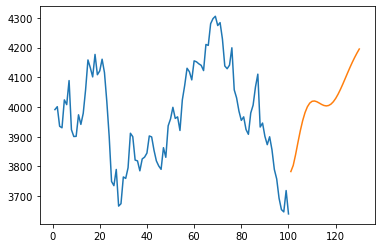

In [45]:
plt.plot(day_new,scaler.inverse_transform(df[906:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [50]:
sp_pred = yf.download('^GSPC',start="2018-10-01", end="2022-10-30",interval='1d')
sp_pred

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01 00:00:00-04:00,2926.290039,2937.060059,2917.909912,2924.590088,2924.590088,3375890000
2018-10-02 00:00:00-04:00,2923.800049,2931.419922,2919.370117,2923.429932,2923.429932,3432620000
2018-10-03 00:00:00-04:00,2931.689941,2939.860107,2921.360107,2925.510010,2925.510010,3625510000
2018-10-04 00:00:00-04:00,2919.350098,2919.780029,2883.919922,2901.610107,2901.610107,3510370000
2018-10-05 00:00:00-04:00,2902.540039,2909.639893,2869.290039,2885.570068,2885.570068,3340820000
...,...,...,...,...,...,...
2022-10-24 00:00:00-04:00,3762.010010,3810.739990,3741.649902,3797.340088,3797.340088,4747930000
2022-10-25 00:00:00-04:00,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000
2022-10-26 00:00:00-04:00,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000


In [51]:
df1 = sp_pred.reset_index()["Close"]

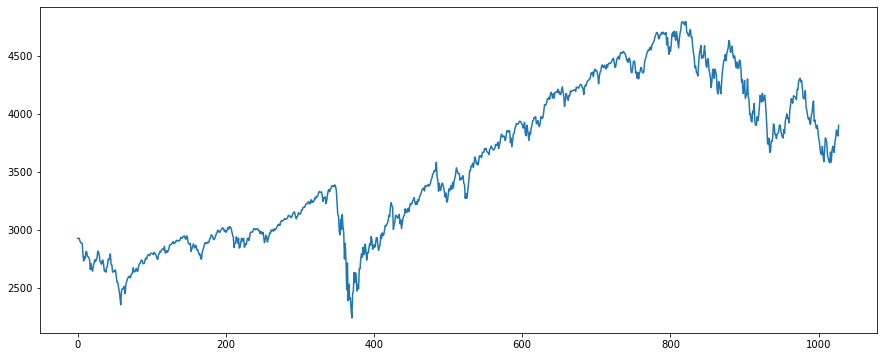

In [53]:
plt.figure(figsize = (15,6))
plt.plot(df1)

# Arima Model

In [40]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [41]:
result = adf_test(sp500['Close'].dropna())

ADF Statistics: -0.7200755796927667
p- value: 0.8414807584155444
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [42]:
### First Shift 
## Use Techniques Differencing
sp500['Close_1']=sp500["Close"]-sp500["Close"].shift(1)

C:\Users\agarw\AppData\Local\Temp\ipykernel_22372\2897223724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Close_1']=sp500["Close"]-sp500["Close"].shift(1)


In [43]:
result = adf_test(sp500['Close_1'].dropna())

ADF Statistics: -15.455432751226276
p- value: 2.7492596733930657e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\agarw\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


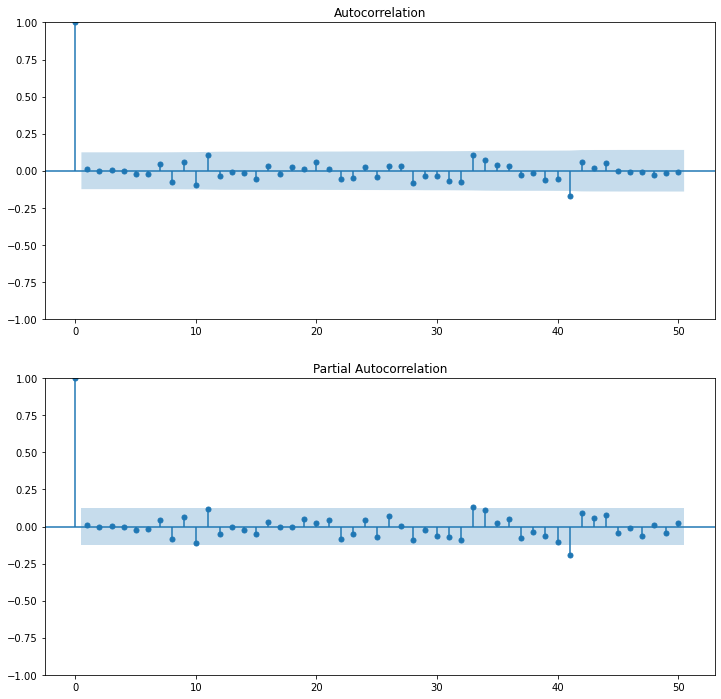

In [47]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
acf = sm.graphics.tsa.plot_acf(sp500['Close_1'].dropna(),lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
pacf = sm.graphics.tsa.plot_pacf(sp500['Close_1'].dropna(),lags=50, ax=ax2)

In [19]:
# For non-seasonal data
#p=0, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [48]:
model = sm.tsa.arima.ARIMA(sp500["Close"],order=(45,1,45))
model_fit=model.fit()

C:\Users\agarw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\agarw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\agarw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\agarw\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  250
Model:               ARIMA(45, 1, 45)   Log Likelihood               -1343.599
Date:                Wed, 08 Feb 2023   AIC                           2869.198
Time:                        13:13:40   BIC                           3189.286
Sample:                             0   HQIC                          2998.039
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0744      0.715     -0.104      0.917      -1.475       1.326
ar.L2         -0.1783      0.561     -0.318      0.751      -1.278       0.921
ar.L3         -0.0242      0.612     -0.039      0.969      -1.224       1.175
ar.L4          0.2128      0.445      0.478      0.633      -0.660       1.086
ar.L5          0.0715      0.345      0.207      0.836      -0.605       0.748
ar.L6          0.3206      0.310      1.036      0.300      -0.286       0.927
ar.L7          0.3485      0.205      1.700      0.089      -0.053       0.750
ar.L8         -0.0166      0.343     -0.048      0.961      -0.689       0.656
ar.L9          0.1519      0.252      0.602      0.547      -0.343       0.647
ar.L10        -0.1155      0.356     -0.324      0.746      -0.814       0.583
ar.L11         0.0645      0.261      0.247      0.805      -0.447       0.576
ar.L12         0.0199      0.309      0.064      0.949      -0.585       0.625
ar.L13        -0.3795      0.304     -1.248      0.212      -0.975       0.216
ar.L14        -0.1481      0.254     -0.583      0.560      -0.646       0.350
ar.L15        -0.1320      0.320     -0.413      0.680      -0.759       0.495
ar.L16         0.0143      0.313      0.046      0.964      -0.600       0.628
ar.L17         0.3701      0.270      1.370      0.171      -0.160       0.900
ar.L18         0.1523      0.222      0.686      0.493      -0.283       0.588
ar.L19         0.3639      0.290      1.254      0.210      -0.205       0.932
ar.L20         0.4143      0.420      0.987      0.323      -0.408       1.237
ar.L21         0.4116      0.569      0.724      0.469      -0.703       1.526
ar.L22        -0.1230      0.738     -0.167      0.868      -1.569       1.323
ar.L23        -0.0782      0.510     -0.153      0.878      -1.078       0.922
ar.L24        -0.2134      0.434     -0.492      0.623      -1.063       0.637
ar.L25        -0.3425      0.284     -1.206      0.228      -0.899       0.214
ar.L26         0.0022      0.233      0.010      0.992      -0.455       0.459
ar.L27         0.0762      0.197      0.388      0.698      -0.309       0.462
ar.L28        -0.3007      0.225     -1.335      0.182      -0.742       0.141
ar.L29         0.2685      0.331      0.811      0.418      -0.381       0.918
ar.L30         0.0351      0.311      0.113      0.910      -0.575       0.646
ar.L31         0.1393      0.245      0.568      0.570      -0.341       0.620
ar.L32         0.2543      0.252      1.010      0.312      -0.239       0.748
ar.L33         0.0399      0.361      0.111      0.912      -0.667       0.747
ar.L34         0.2613      0.331      0.790      0.429      -0.387       0.909
ar.L35        -0.1389      0.490     -0.284      0.777      -1.099       0.821
ar.L36        -0.1446      0.308     -0.470      0.638      -0.748       0.459
ar.L37        -0.1651      0.181     -0.914      0.361      -0.519       0.189
ar.L38        -0.3008      0.175     -1.721      0.085      -0.643       0.042
ar

In [57]:
sp500['forecast']=model_fit.predict(start="2022-05-01",end="2022-05-28",dynamic=True)
sp500[['Close','forecast']].plot(figsize=(12,8))

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [23]:
### 12 months 
## Use Techniques Differencing
sp500['Close 12 Difference']=sp500["Close"]-sp500["Close"].shift(24)

C:\Users\agarw\AppData\Local\Temp\ipykernel_22372\1939982788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Close 12 Difference']=sp500["Close"]-sp500["Close"].shift(24)


# Sarimax

In [27]:
model=sm.tsa.statespace.SARIMAX(sp500["Close"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\agarw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\agarw\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\agarw\AppData\Local\Temp\ipykernel_22372\1148846251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['forecast']=results.predict(start="2020-10-01",end="2020-11-30",dynamic=True)


(18414.0, 18687.0)

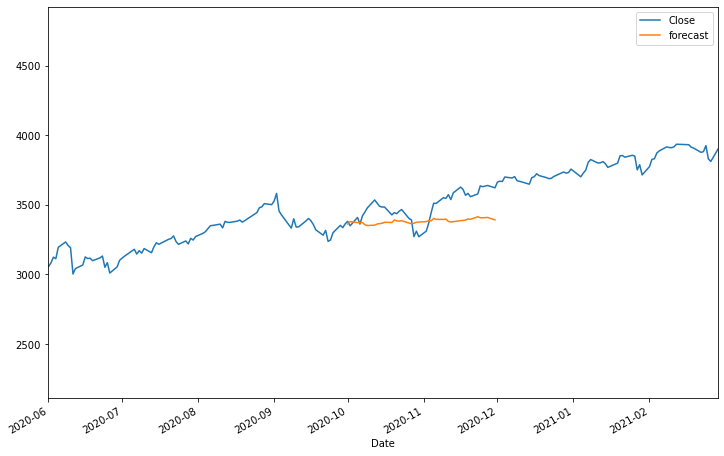

In [33]:
sp500['forecast']=results.predict(start="2020-10-01",end="2020-11-30",dynamic=True)
sp500[['Close','forecast']].plot(figsize=(12,8))
plt.xlim(pd.Timestamp('2020-06-01'), pd.Timestamp('2021-03-01'))

In [ ]:
result = adf_test(sp500['Close 12 Difference'].dropna())


In [ ]:
### 2_12 months 
## Use Techniques Differencing
sp500['Close 2_12 Difference']=sp500["Close 12 Difference"]-sp500["Close 12 Difference"].shift(1)

In [ ]:
result_1 = adf_test(sp500['Close 2_12 Difference'].dropna())

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
acf12 = plot_acf(sp500['Close 12 Difference'].dropna())

In [ ]:
pacf12 = plot_pacf(sp500['Close 2_12 Difference'].dropna())

In [ ]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,365))

In [ ]:
# Test for random walk hypothesis using Augmented Dickey-Fuller test
result = adfuller(sp500["returns"])
print("ADF Test:")
print("Test Statistic: ", result[0])
print("p-value: ", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t", key, ": ", value)

In [ ]:
# Plot autocorrelation and partial autocorrelation
plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
acf_result = acf(sp500["returns"], nlags=30)
plt.plot(acf_result)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sp500["returns"])), linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(sp500["returns"])), linestyle="--", color="gray")
plt.title("Autocorrelation")

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,2)
pacf_result = pacf(sp500["returns"], nlags=30, method="ols")
plt.plot(pacf_result)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(sp500["returns"])), linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(sp500["returns"])), linestyle="--", color="gray")
plt.title("Partial Autocorrelation")


In [ ]:
plt.tight_layout()
plt.show()